In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.units as munits

In [2]:
#  load data
df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)

C:\Users\sylvi\AppData\Local\Temp\ipykernel_27068\346579293.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


In [3]:
# sanity check
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [4]:
# split date and time into separate columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)

In [5]:
# convert date column to datetime 
pd.to_datetime(df["date"])
df["date"]= pd.to_datetime(df['date'])
df["date"]

C:\Users\sylvi\AppData\Local\Temp\ipykernel_27068\2925571304.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["date"])
C:\Users\sylvi\AppData\Local\Temp\ipykernel_27068\2925571304.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


0        1996-04-10
1        1996-07-31
2        1996-07-31
3        1996-07-31
4        1996-07-31
            ...    
247669   2024-10-31
247670   2024-10-31
247671   2024-10-31
247672   2024-10-31
247673   2024-11-01
Name: date, Length: 247674, dtype: datetime64[ns]

In [6]:
# set date column as index column
df.set_index('date', inplace=True)

In [7]:
df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,time
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,14:00
1996-07-31,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,08:00
1996-07-31,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,09:00
1996-07-31,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,0,25,82,0.0,28000,35,6,10:00
1996-07-31,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,0,2,11,0.0,40000,40,6,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,0,0.2,0,10.1,0,10.1,10.1,12.4,100,1024.2,...,5,2,220,,,0.0,,0,8,20:00
2024-10-31,0,0.1,0,10.1,0,10.1,10.0,12.4,100,1023.9,...,5,2,230,,,0.0,,0,8,21:00
2024-10-31,0,0.0,0,10.0,0,10.0,10.0,12.3,100,1023.7,...,4,2,210,,,0.0,,0,8,22:00


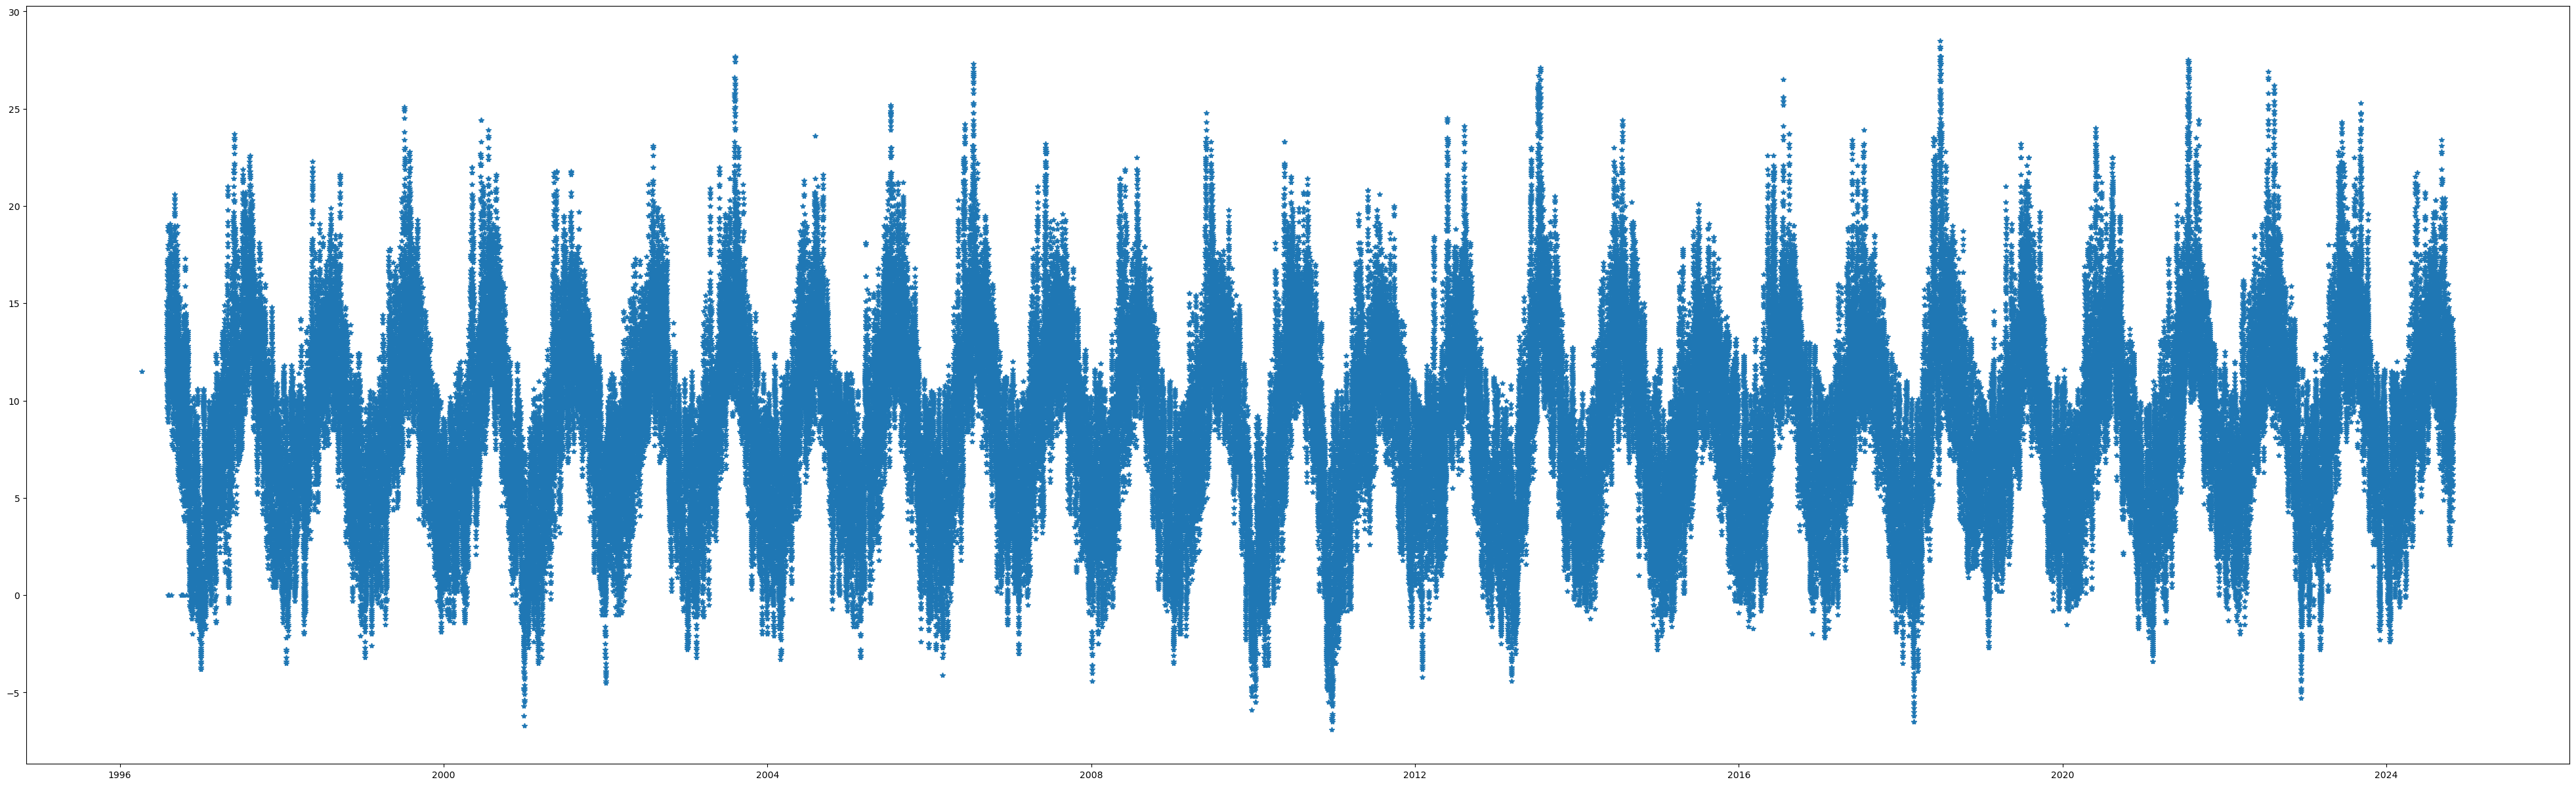

In [8]:
# plot temperature vs date
fig, ax = plt.subplots(figsize=(50, 15))

temp=df["temp"]
temp=temp.to_numpy()

ax.plot(df.index, temp, "*")

In [9]:
# calculate mean figures for each numerical column per day
mean_per_day=df.groupby([df.index]).mean(numeric_only =True)
# sanity check
mean_per_day

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
date,,,,,,,,,,,
1996-04-10,0.000000,0.0,11.500000,0.0,8.100000,3.900000,0.000000,0.000000,0.000,0.000,0.000000
1996-07-31,0.000000,0.0,12.650000,0.0,10.687500,8.693750,0.000000,0.000000,0.000,0.000,0.000000
1996-08-01,0.833333,0.0,11.666667,0.0,10.370833,9.100000,11.108333,80.833333,2.125,2.125,0.045833
1996-08-02,0.000000,0.0,12.504167,0.0,11.229167,10.045833,12.308333,85.666667,2.000,2.000,4.695833
1996-08-03,0.000000,0.0,14.266667,0.0,12.395833,10.729167,12.904167,80.541667,2.000,2.000,0.441667
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,0.250000,0.0,11.487500,0.0,11.395833,11.291667,13.416667,98.875000,2.000,2.000,0.000000
2024-10-29,0.583333,0.0,10.445833,0.0,10.341667,10.245833,12.479167,98.750000,2.000,2.000,0.000000
2024-10-30,0.541667,0.0,10.983333,0.0,10.983333,10.979167,13.112500,100.000000,2.000,2.000,0.000000


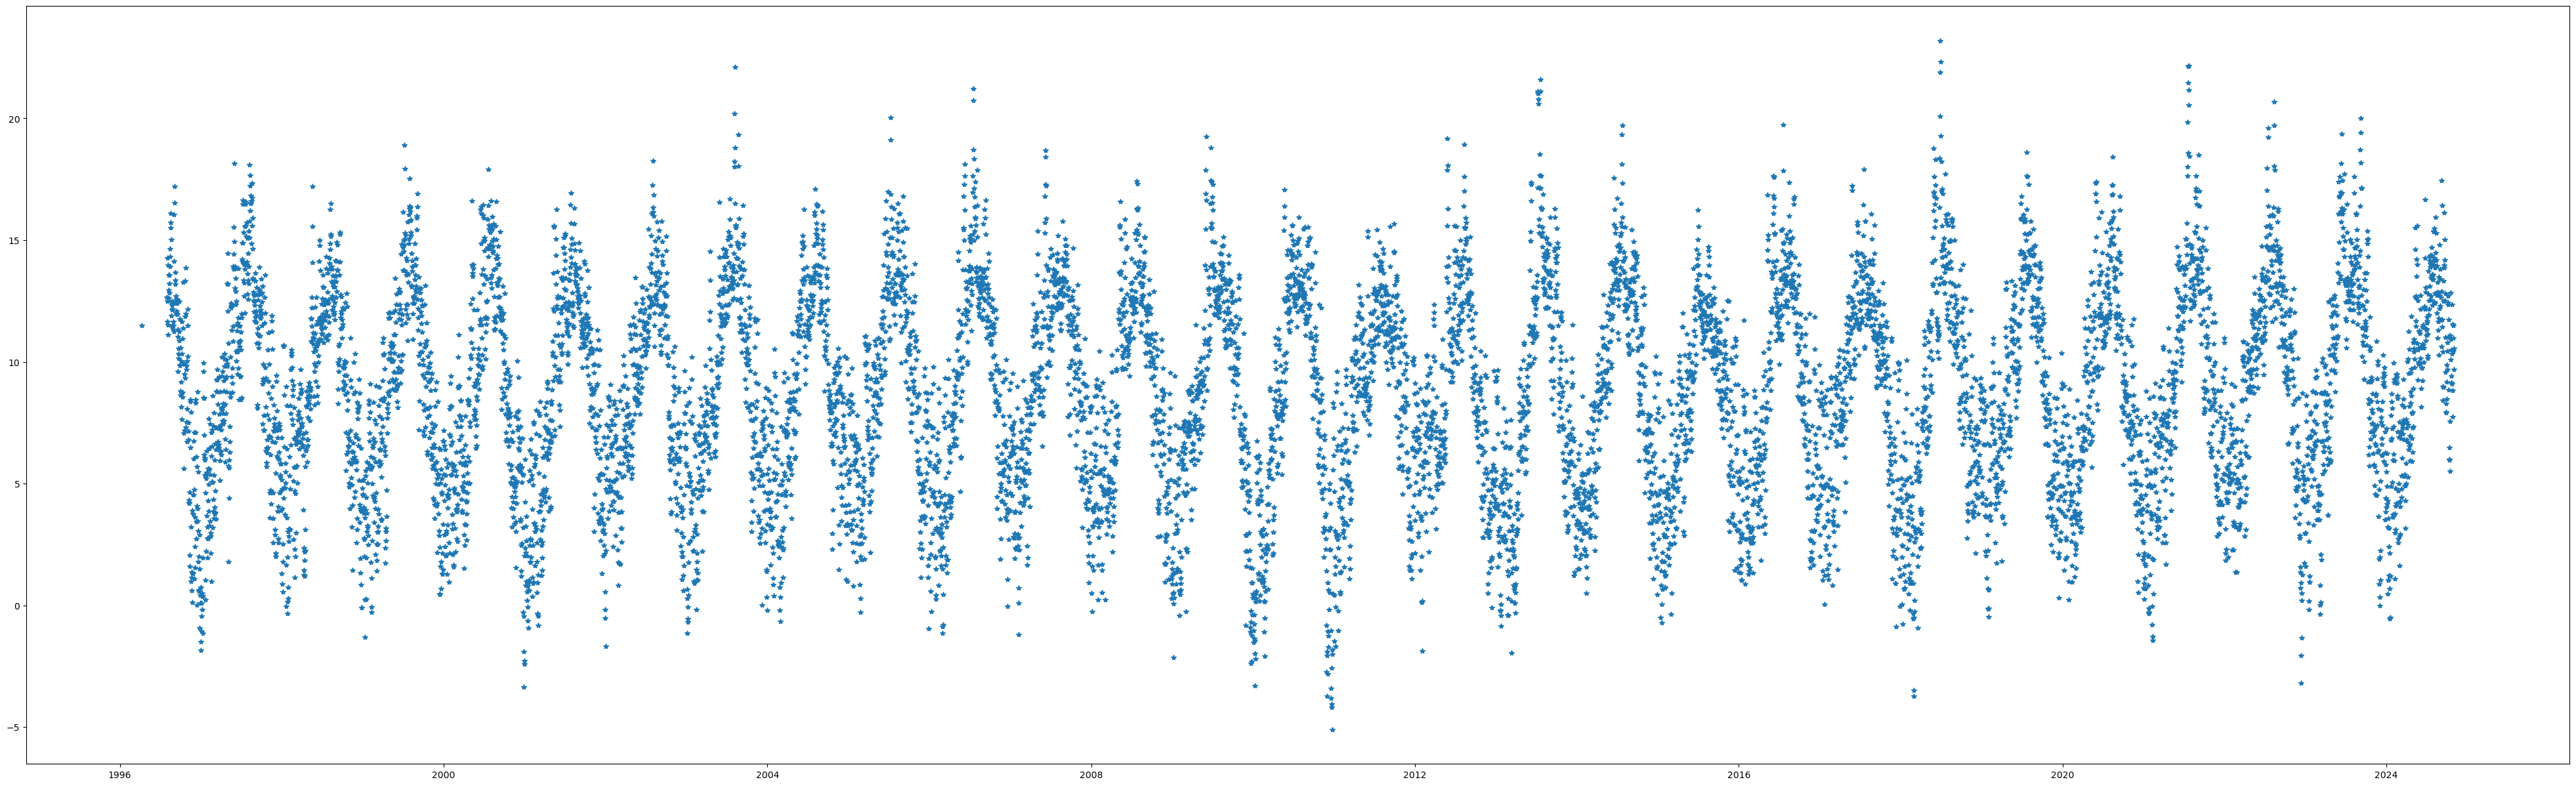

In [10]:
# plot mean temperature vs date
fig, ax = plt.subplots(figsize=(50, 15))

temp=mean_per_day["temp"]
temp=temp.to_numpy()

ax.plot(mean_per_day.index, temp, "*")

In [11]:
# calculate mean figures for each numerical column per month
mean_per_month=df.groupby([df.index.month]).mean(numeric_only =True)
# sanity check
mean_per_month

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
date,,,,,,,,,,,
1,0.625816,0.078869,4.348502,0.124376,3.875562,3.146673,7.850658,92.180060,2.000672,2.001248,0.055362
2,0.540139,0.056837,4.686452,0.090603,4.065666,3.111078,7.836541,89.978350,2.004214,2.004530,0.078772
3,0.477487,0.035714,5.625178,0.061828,4.701056,3.344681,7.962486,86.257969,2.000480,2.000720,0.116979
4,0.407271,0.008581,7.519131,0.016765,6.206577,4.471202,8.583448,82.530926,1.999901,2.000099,0.167581
5,0.359975,0.001344,10.212284,0.001632,8.654263,6.891187,10.137337,81.597398,2.001152,2.001152,0.191945
6,0.317063,0.000000,12.366806,0.000000,10.838611,9.340982,11.920114,83.248413,2.000000,2.004067,0.165174
7,0.376823,0.000000,13.650432,0.000000,12.374117,11.243232,13.484118,86.458317,1.998369,1.998561,0.133384
8,0.415786,0.000000,13.561267,0.000000,12.416996,11.393108,13.620259,87.679088,2.003754,2.000417,0.174866
9,0.452059,0.000000,12.092390,0.000000,11.099416,10.134310,12.575536,88.588170,1.996216,1.995738,0.139852


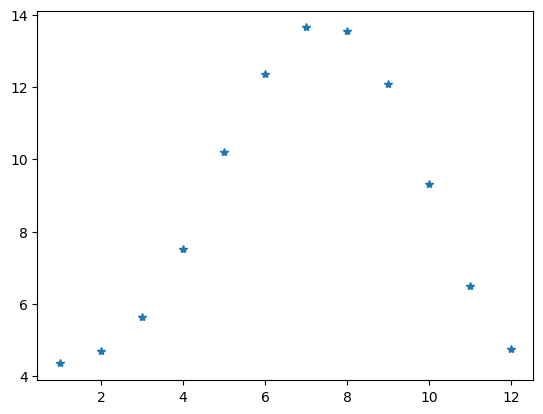

In [12]:
# plot mean temperature vs date
fig, ax = plt.subplots()

temp=mean_per_month["temp"]
temp=temp.to_numpy()

ax.plot(mean_per_month.index, temp, "*")

In [21]:
# clean windspeed data
#clean_wind = df["date","wdsp"]
# drop missing values from windspeed data
df["wdsp"]= df.loc[:,("wdsp")].replace(' ', np.nan)
df.dropna(inplace=True)
# convert to floats
df['wdsp']=df['wdsp'].astype(float)

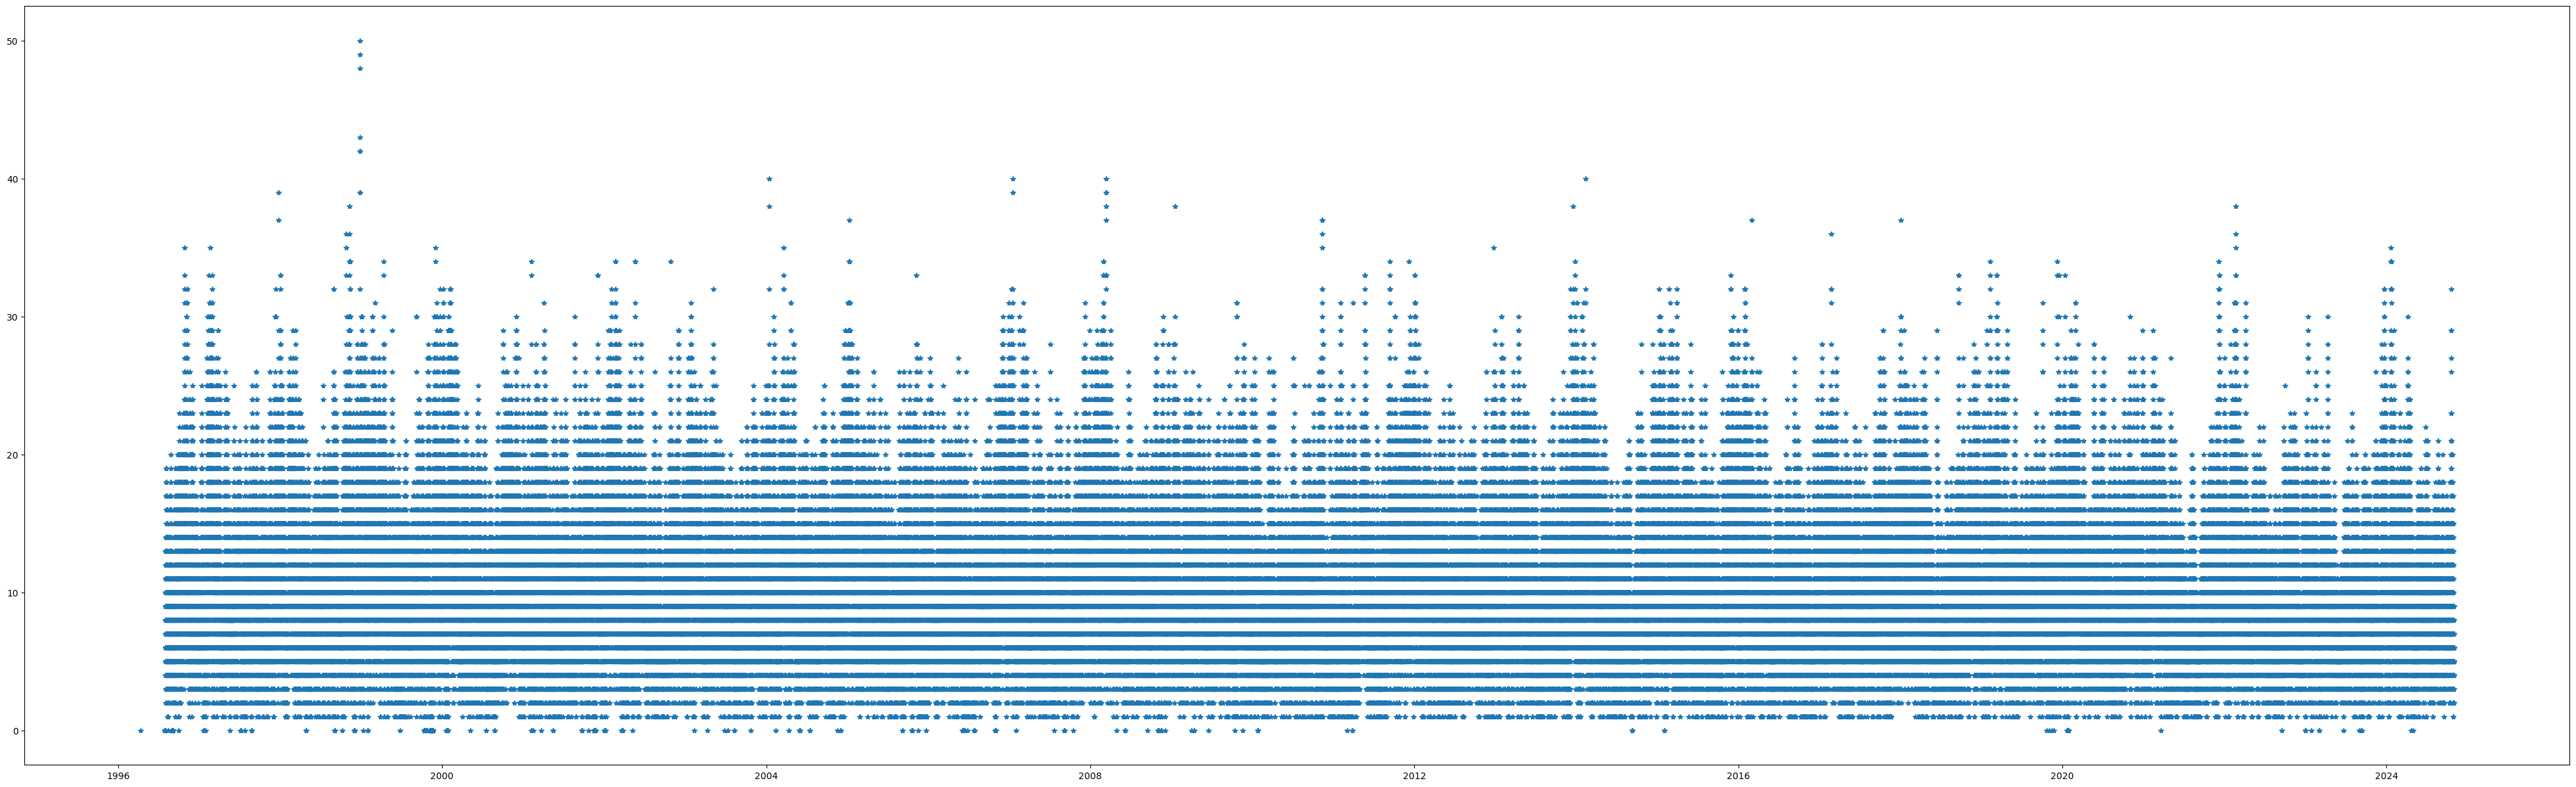

In [22]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50, 15))

wdsp=df["wdsp"]
wdsp=wdsp.to_numpy()

ax.plot(df.index, wdsp, "*")

## References
https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis

https://stackoverflow.com/questions/21706030/pandas-groupby-agg-function-column-dtype-error